# Fraud Detection

Fraud management:
* Manually set thresholds and experience
* News
* External lists of fraudulent accounts 
* Machine learning algorithms

Freference:    
    [recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)
    
[Confusion Matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
    
    

In [24]:
# Import library and read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("data1/creditcard.csv",header=0)
df=df.set_index(df.columns.values[0])

# Count the occurrences of fraud and no fraud 
occ = df['Class'].value_counts()
print(occ)
print(occ / len(df.index))

0    7983
1      17
Name: Class, dtype: int64
0    0.997875
1    0.002125
Name: Class, dtype: float64


## 1. Synthetic Minority Oversampling Technique (SMOTE)
Resampling: Consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).
    
SMOTE consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [26]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

# Create X and y from the prep_data function 
X, y = prep_data(df)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (8000, 28)
y shape: (8000,)


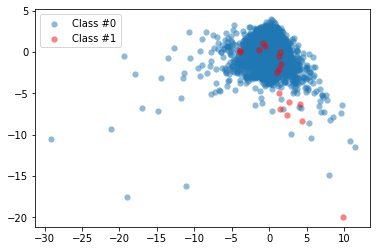

In [27]:
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()
plot_data(X,y)

0.7.0


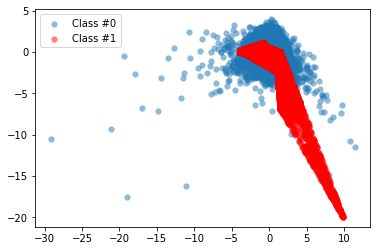

X_resampled shape: (15966, 28)
y_resampled shape: (15966,)


In [28]:
# Resampling method
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
method = SMOTE()
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)
plot_data(X_resampled, y_resampled)
print(f'X_resampled shape: {X_resampled.shape}\ny_resampled shape: {y_resampled.shape}')

### Compare the resampling data with original set

0    7983
1      17
dtype: int64
1    7983
0    7983
dtype: int64


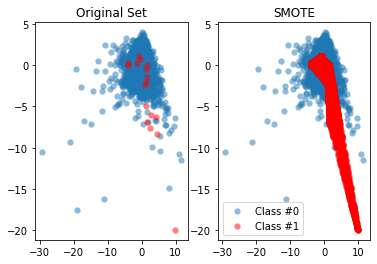

In [29]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_resampled)))

def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

## 2. Flag fraudulent transactions with Supervised Machine Learning

Train, adjust and compare classifiers to find the most efficient fraud detection model on labeled data


In [30]:
# Count the total number of non-fraudulent observations 
df = pd.read_csv("data1/creditcard2.csv",header=0)
#df=df.set_index(df.columns.values[0])
X, y = prep_data(df)
total_obs = len(y)
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')

95.89%


#### How to imporve the predicting fraud higher than 95.89%?

### Neural networks

In [31]:
# Set the input and output data
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
method = SMOTE()
# Create the resampled feature set
X_resampled0, y_resampled0 = method.fit_sample(X_train, y_train)
training_input = X_resampled0
training_output = y_resampled0

# Create and train the neural network with 3 hidden layers
model = Sequential()
model.add(Dense(32, input_dim=28, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop')
model.fit(training_input, training_output, epochs=10)

Epoch 1/10
9802/9802 [==============================] - 0s 33us/step - loss: 0.2402
Epoch 2/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402: 0s - loss: 0.23
Epoch 3/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402
Epoch 4/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402
Epoch 5/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402
Epoch 6/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402
Epoch 7/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402
Epoch 8/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402
Epoch 9/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402
Epoch 10/10
9802/9802 [==============================] - 0s 23us/step - loss: 0.2402


In [32]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=123, n_estimators=100)

# Fit training model to training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
# Print the accuracy score the model
print('\naccuracy:')
print(model.score(X_test, y_test))


ROC Score:
0.9618290237632781

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190


accuracy:
0.991324200913242


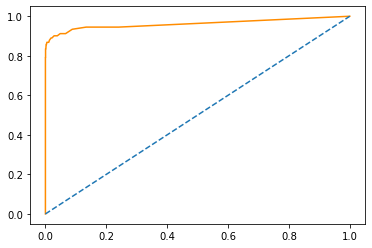

In [33]:
# Plot the ROC curve of the probabilities of default
prob_default = probs[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

Precision: [0.04155251 0.98648649 1.        ]
Recall: [1.        0.8021978 0.       ]


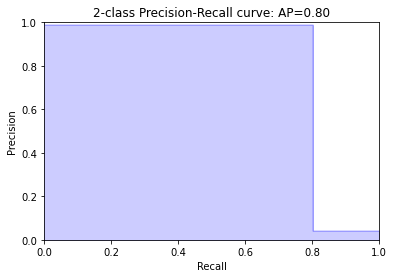

In [34]:
# Plotting the Precision vs. Recall Curve
average_precision = average_precision_score(y_test, predicted)
precision, recall, _ = precision_recall_curve(y_test, predicted)
print(f'Precision: {precision}\nRecall: {recall}')
def plot_pr_curve(recall, precision, average_precision):
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()
plot_pr_curve(recall, precision, average_precision)

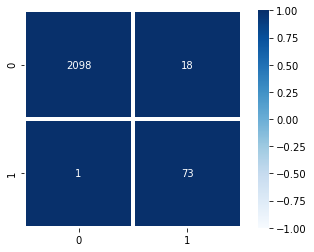

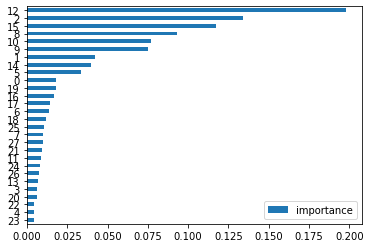

In [35]:
import seaborn as sns
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=predicted)
cm=pd.DataFrame(confusionMatrix.T, index=model.classes_, columns=model.classes_)
sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)    

pd.DataFrame({'feature':df.columns.drop(['Unnamed: 0','Amount','Class']), 'importance':model.feature_importances_}).sort_values(['importance']).plot(kind='barh')

### Tuning model

In [36]:
### Adjusting RF for fraud detection
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
   
    model.fit(X_train, y_train)

    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))
    
    
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=123)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9735771612855938

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.95      0.85      0.90        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2095    4]
 [  14   77]]


### Parameter optimization with GridSearchCV

GridSearchCV evaluates all combinations of parameters defined in the parameter grid

In [37]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=123)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [38]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=8,
                               max_features='auto', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9668130821060789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.96      0.84      0.89        91

    accuracy                           0.99      2190
   macro avg       0.98      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2096    3]
 [  15   76]]


## Ensemble methods
Ensemble methods are techniques that create multiple machine learning models and then combine them to produce a final result

### Stacking Ensemble Methods_Voting Classifier

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=123,
                          solver='liblinear')

clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=123)

clf3 = DecisionTreeClassifier(random_state=123,
                              class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

### Adjusting weights within the Voting Classifier
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.90      0.86      0.88        91

    accuracy                           0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2090    9]
 [  13   78]]
ROC Score:
0.9736242794842129

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.93      0.85      0.89        91

    accuracy                           0.99      2190
   macro avg       0.96      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2093    6]
 [  14   77]]


# 3. K-means clustering for unlabled data
Use unsupervised learning techniques to detect fraud

In [40]:
banksim_df = pd.read_csv('data1/banksim.csv',header=0)
banksim_df.drop(['Unnamed: 0'], axis=1, inplace=True)
banksim_adj_df = pd.read_csv('data1/banksim_adj.csv',header=0)
banksim_adj_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### EDA

In [41]:
banksim_df.groupby(['category']).mean()

,amount,fraud
category,,
es_barsandrestaurants,43.841793,0.022472
es_contents,55.170000,0.000000
es_fashion,59.780769,0.020619
es_food,35.216050,0.000000
es_health,126.604704,0.242798
es_home,120.688317,0.208333
es_hotelservices,172.756245,0.548387
es_hyper,46.788180,0.125000
es_leisure,229.757600,1.000000


In [42]:
banksim_df.groupby(['age']).mean()

,amount,fraud
age,,
0,49.468935,0.050000
1,35.622829,0.026648
2,37.228665,0.028718
3,37.279338,0.023283
4,36.197985,0.035966
5,37.547521,0.023990
6,36.700852,0.022293
U,39.117000,0.000000


In [43]:
banksim_df.age.value_counts()

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

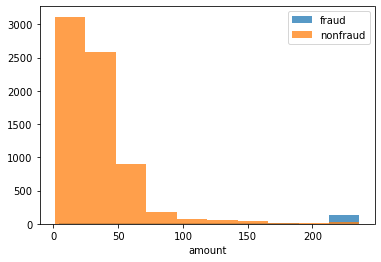

In [44]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = banksim_df[banksim_df.fraud == 1] 
df_non_fraud = banksim_df[banksim_df.fraud == 0]
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.75, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.75, label='nonfraud')
plt.xlabel('amount')
plt.legend()
plt.show()


###  Generate an elbow curve to optimze the number of clusters

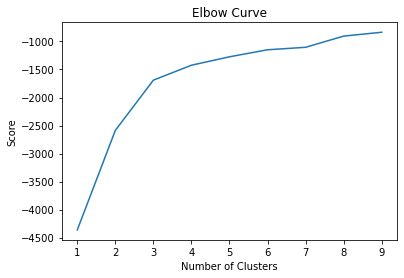

In [45]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
labels = banksim_adj_df.fraud
cols = ['age', 'amount', 'M', 'es_barsandrestaurants', 'es_contents',
        'es_fashion', 'es_food', 'es_health', 'es_home', 'es_hotelservices',
        'es_hyper', 'es_leisure', 'es_otherservices', 'es_sportsandtoys',
        'es_tech', 'es_transportation', 'es_travel']
# Take the float values of df for X
X = banksim_adj_df[cols].values.astype(np.float)
# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=123)
# Fit the model to the scaled data
kmeans.fit(X_scaled)
# Define the range of clusters to try
clustno = range(1, 10)
# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]
# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Train model and predict the fraud

In [46]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=123)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

### Measure performance metrics

0.8599785407725322
Confusion matrix, without normalization


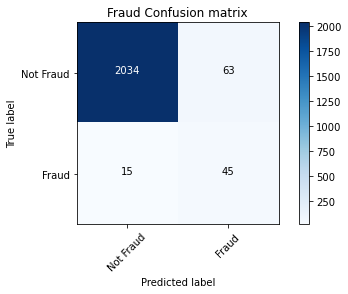

In [47]:
from itertools import product
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))
# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm)

Alternative method: DBSCAN, Density-Based Spatial Clustering of Applications with Noise 
Reference:
    [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN)

# 4. Fraud detection using text
Use text data, text mining and topic modeling to detect fraudulent behavior.

The text data containing emails from Enron employees. 
Enron employees covered up the bad financial position of the company, thereby keeping the stock price artificially high. 
Enron employees sold their own stock options, and when the truth came out, Enron investors were left with nothing. 
The goal is to find all emails that mention specific words, such as "sell enron stock".


In [61]:
df = pd.read_csv('data1/enron_emails_clean.csv',header=0)
mask = df['clean_content'].str.contains('sell enron stock', na=False)
df[mask]

,Message-ID,From,To,Date,content,clean_content
154,<6336501.1075841154311.JavaMail.evans@thyme>,('sarah.palmer@enron.com'),('sarah.palmer@enron.com'),2002-02-01 14:53:35,\nJoint Venture: A 1997 Enron Meeting Belies O...,joint venture enron meeting belies officers cl...


### Create a list to search and flag the terms
Create an actual flag variable that gives a 1 when the emails get a hit on the search terms of interest, and 0 otherwise.

In [56]:
import numpy as np
# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter the cleaned emails on search for list and select from df 
filtered_emails = df[df.clean_content.str.contains('|'.join(searchfor), na=False)]

# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

0    1776
1     314
Name: flag, dtype: int64


In [63]:
filtered_emails.head()

,Message-ID,From,To,Date,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...


### Text Mining
Removing stopwords; Cleaning text data


In [66]:
# Define stopwords to exclude
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
stop.update(("to", "cc", "subject", "http", "from", "sent", "ect", "u", "fwd", "www", "com", 'html'))
# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chunx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
import string
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

# Import the lemmatizer from nltk
lemma = WordNetLemmatizer()

def clean(text, stop):
    text = str(text).rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized
# Clean the emails in df and print results
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())    
text_clean[0][:10]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chunx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['investools',
 'advisory',
 'free',
 'digest',
 'trusted',
 'investment',
 'advice',
 'unsubscribe',
 'free',
 'newsletter']

### Latent Dirichlet Allocation (LDA) topic modeling

[reference](https://www.datacamp.com/community/tutorials/lda2vec-topic-model)

In [71]:
# Topic Modeling
from gensim import corpora
import gensim

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)
# Filter out (non)frequent words 
dictionary.filter_extremes(no_below=10, keep_n=500000)
# Define the corpus 
corpus = [dictionary.doc2bow(text) for text in text_clean]
print(dictionary)
corpus[0][:10]

Dictionary(3730 unique tokens: ['account', 'accurate', 'address', 'advice', 'advise']...)


[(0, 2),
 (1, 1),
 (2, 1),
 (3, 6),
 (4, 1),
 (5, 2),
 (6, 4),
 (7, 1),
 (8, 2),
 (9, 1)]

In [75]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Save the topics and top 10 words
topics = ldamodel.print_topics(num_words=3)

# Print the results
for topic in topics:
    print(topic)

(0, '0.009*"company" + 0.005*"new" + 0.005*"said"')
(1, '0.016*"employee" + 0.012*"please" + 0.010*"company"')
(2, '0.024*"message" + 0.023*"pm" + 0.020*"original"')
(3, '0.041*"image" + 0.018*"hou" + 0.010*"se"')
(4, '0.062*"net" + 0.055*"money" + 0.053*"tr"')


### Visualize the topics

In [76]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

### Assign topics to the original data 
Determine what topic a given text is about

In [79]:
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_details_df = topic_details_df.append(pd.Series([topic_num, prop_topic]), ignore_index=True)
    topic_details_df.columns = ['Dominant_Topic', '% Score']
    return topic_details_df


contents = pd.DataFrame({'Original text':text_clean})
topic_details = pd.concat([get_topic_details(ldamodel,
                           corpus), contents], axis=1)

topic_details.head(5)

,Dominant_Topic,% Score,Original text
0,0.0,0.923164,"[investools, advisory, free, digest, trusted, ..."
1,0.0,0.830062,"[forwarded, richard, b, sander, hou, pm, justi..."
2,0.0,0.585499,"[hey, wearing, target, purple, shirt, today, m..."
3,1.0,0.992646,"[leslie, milosevich, santa, clara, avenue, ala..."
4,1.0,0.992551,"[rini, twait, e, th, ave, longmont, co, rtwait..."


### Detect fraud based on topic

In [81]:
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_details_df = topic_details_df.append(pd.Series([topic_num, prop_topic]), ignore_index=True)
    topic_details_df.columns = ['Dominant_Topic', '% Score']
    return topic_details_df
# Run get_topic_details function and check the results
topic_details_df = get_topic_details(ldamodel, corpus)


# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)
topic_details.sort_values(by=['% Score'], ascending=False).head(10).head()

,Dominant_Topic,% Score,Original text
2081,4.0,0.999415,"[unsubscribe, mailing, please, go, money, net,..."
478,0.0,0.999265,"[greeting, jeff, thanks, make, copy, bring, cl..."
2087,3.0,0.999050,"[image, image, image, image, image, image, ima..."
280,0.0,0.998926,"[financial, express, wednesday, october, anti,..."
149,0.0,0.998504,"[electricity, trading, build, oh, slowly, fran..."


### Create flag for text highest associated with topic 1
The topic 1 seems include the information about 'stock', 'market','price', et al.

In [82]:
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 1.0), 1, 0)
topic_details_1 = topic_details[topic_details.flag == 1]
topic_details_1.sort_values(by=['% Score'], ascending=False).head(10)

,Dominant_Topic,% Score,Original text,flag
2088,1.0,0.997949,"[transmission, expansion, system, transition, ...",1
2000,1.0,0.996761,"[raquel, nunes, thomas, auto, confirm, amazon,...",1
287,1.0,0.992993,"[anne, walton, sandberg, pine, street, suite, ...",1
104,1.0,0.992978,"[david, gold, west, th, street, apt, c, new, y...",1
126,1.0,0.992915,"[erin, day, th, st, san, francisco, ca, erincd...",1
169,1.0,0.992911,"[scott, cook, n, marine, drive, c, chicago, il...",1
233,1.0,0.992882,"[michael, gross, south, evans, n, chicago, il,...",1
59,1.0,0.992878,"[thomas, scott, th, street, b, forest, hill, n...",1
87,1.0,0.992871,"[christian, brown, po, box, santa, barbara, ca...",1
156,1.0,0.992868,"[elizabeth, crown, west, goethe, street, l, ch...",1
